# The Singular Value Decomposition (SVD)


Before we start with the implementation of some applications of the singular value decomposition (SVD), we will briefly introduce the theory behind it.  
The SVD is widely used in Data Science. The applications are for example  

* least-squares regression
* model or dimensionality reduction
* image compression
* principal component analysis
* ...
---
## Some basics
Given a matrix $A \in \mathbb{R}^{m\times n}$, we want to compute orthogonal matrices $U \in \mathbb{R}^{m\times m}$ and $V \in \mathbb{R}^{n\times n}$ such that <br>    
$$ U^T AV = \Sigma \in \mathbb{R}^{m\times n}$$  
where $\Sigma$ is a diagonal matrix in a sense that 
$$
     \Sigma =\left\{\begin{array}{ll} \begin{pmatrix} \hat{\Sigma} \\ 0 \end{pmatrix}, & m \geq n \\
         \left( \hat{\Sigma} \, 0 \right), & m \leq n \end{array}\right. .
$$<br>
The matrix $\hat{\Sigma} \in \mathbb{R}^{p\times p}$ is a square and diagonal matrix with $p = \min{(m,n)}$. The diagonal entries are given by $\sigma_1,...,\sigma_p$ with <br>  
$$ \sigma_1 \geq \sigma_2 \geq ... \geq \sigma_r > \sigma_{r+1} = ... = \sigma_p = 0$$  
We call $\sigma_1,...,\sigma_r$ the singular values (SV) of the matrix $A$. It is possible that $r = p$. <br> 
There is a link between the singular values of some matrix $A\in\mathbb{R}^{m\times n}$ and the eigenvalues of the matrix $A^T A \in \mathbb{R}^{m\times m}$ and $A A^T\in\mathbb{R}^{n\times n}$:<br>    
$$ \sigma_j = \sqrt{\lambda_j(A^TA)} = \sqrt{\lambda_j(AA^T)}, \, j = 1,...,r. $$ <br> 
This can be used to compute the singular values of the matrix $A$. We just have to determine the eigenvalues of the matrix $AA^T$ and take the square root of each eigenvalue. Another way to compute the singular values of the matrix $A$ is to use the SVD-algorithm described by Golub, Kahan and Reinsch in 1965 (see [here](https://www3.math.tu-berlin.de/Vorlesungen/SS14/MatricesGraphsPDEs/paper_for_students/GolubKahanSVD.pdf) for more information). 
## Why use SVD?
We assume that we calculated the SVD of some matrix A with $rank(A) = r$. We can express the matrix as<br> 
$$ A = \sum_{j = 1}^{r} \sigma_j u_j v_j^T $$ 
where $u_j \, j =1,...,m$ are the columns of the matrix $U$ and $v_j \, j=1,...,n$ are the columns of the matrix $V$.
We can define a matrix $A_k$ as<br>  
$$ A_k =  \sum_{j = 1}^{k} \sigma_j u_j v_j^T $$ 
with a $k \leq r$. We call the matrix $A_k$ the rank k-approximation of the matrix $A$ since $rank(A_k)=k$. <br>   
One property of the matrix $A_k$ is that it is the best rank k-approximation of the matrix $A$. This means that for any matrix $B \in \mathbb{R}^{m\times n}$ with $rank(B) \leq k$, we have<br>  
$$ ||A - A_k||_2 \leq ||A - B||_2.$$   
For a more detailed introduction you can have a look at [this](https://en.wikipedia.org/wiki/Singular_value_decomposition) (or other sites that introduce the SVD). The so called spectral norm is defined as <br>
$$ ||A||_2^2 = \max_{||x||_2 = 1} ||Ax||_2^2 $$.

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg

## Compute the SVD

To determine the SVD of a matrix A, we will use the numpy function numpy.linalg.svd(A) (you can find more information [here]( https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)). The function returns two matrices and a vector: <br>
* The matrix U that contains the left singular vectors
* The vector S that contains the singular values
* The matrix V that contains the right singular vectors. <br>   
---
We can calculate the matrix A by simply multiplying the three matrices. Since only the singular values are stored (and not the whole matrix S), we have to create a matrix out of the vector. Try to find out how this can be done ([this](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) might help).<br>
If we want to multiply the matrices, we can use the numpy.matmul function (see [this](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)). Instead of using the numpy.matmul function, we can simply use the "@" operator (for example if we want to multiply the matrices A and B we would write A @ B). The "@"-operator does the same as the numpy.matmul function. <br>

---

Next, we want to get more familiar with the SVD-command.  For this purpose think of any low-dimensional matrix you want, calculate the SVD of this matrix and multiply the matrices U,S and V. Think about a way we can compare those two matrices (for example you could calculate the differences in every matrix component and sum these differences up, see for example [here](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html), where the frobenius norm is described).

In [2]:
#Todo: Assemble a low-dimensional matrix and calculate the SVD of this matrix
A = [[1,2,3,4],[5,6,7,8],[9,10,12,15],[666,42,2021,10]]
U,S,V = np.linalg.svd(A)
#Todo: Multiply the matrices U,S and V and compare the result with the matrix A 
A_ = U @ np.diag(S) @ V

fro = np.linalg.norm(A-A_)

print("The Frobenius-norm of A-A_ is:",fro)


The Frobenius-norm of A-A_ is: 1.268969298164837e-12


## Calculation of the rank-k approximation

The next step is to write a function that gets the full SVD as input and returns the matrices $U_k$ and $V_k$ and the vector $\Sigma_k$ which are used to calculate the rank k-approximation $A_k$. You can reuse the matrix from the task above to calculate the differences of the matrix A_k and A. If possible you can try to verify the Eckardt-Young-Mirsky Theorem (see [here](https://en.wikipedia.org/wiki/Low-rank_approximation#Proof_of_Eckart%E2%80%93Young%E2%80%93Mirsky_theorem_(for_Frobenius_norm))): <br>
$$ ||A - A_k||_F^2 = \sum_{i = k+1}^r \sigma_{i}^2.$$ The term $$||*||_F$$ refers to the so called Frobenius-norm. You might need a matrix of dimension at least 4x4 (You can then truncate two SV and still have two SV left to verify the theorem).

In [3]:
def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

# Todo: Calculate the resulting matrix when truncating SV. Try to verify the Eckardt-Young-Minsky theorem numerically
    
A = [[1,2,3,13,4],[13,5,6,7,8],[13,9,10,11,12],[13,13,14,15,16],[13,2,5,2,5]]
U,S,V = np.linalg.svd(A)
U_,S_,V_ = truncate(U,S,V,2)

A_ = U_ @np.diag(S_)@V_

normA = np.linalg.norm(A-A_)
ref = np.sqrt(S[2]*S[2]+S[3]*S[3]+S[4]*S[4])

print("The Frobenius norm of A-A_ is:" ,normA,"The sum of the squared, trucated SV is:",ref)


The Frobenius norm of A-A_ is: 6.200512993657734 The sum of the squared, trucated SV is: 6.200512993657732


## Wine classification

We already learned how to calculate the SVD and the rank-k approximation of a matrix. The next topic we want to have a look at is the dimension reduction of some data. For this purpose we will have a look at a classification task. There is a wide range of possible examples for classification tasks. One simple example is the spam filter of your email account that has to decide wheter an incoming email is spam or not. The inspiration of the following tasks is providedby Lorenzo de Nisi and can be found [here](https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications).<br>
In our example we will deal with the classification of wine. In our dataset, we have three different classes of wine which are called "class_0", "class_1" and "class_2". The different classes belong to wine grown in the same region in Italy.   [Here](https://archive.ics.uci.edu/ml/datasets/wine), you can find more information about the dataset.  Additionally we have 178 different bottles of wine that we want to classify. That means that we want to assign each bottle to one of the three classes. To do so we have 13 different features. <br>
The first step is to load the data. This is done in the following code snippet. When using the command wine.keys() we have a deeper insight in what we get from loading the dataset.

In [4]:
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd

#load the data
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

We can see the output of wine.keys() above. In the next step we will have a closer look at the data. We find the two entries 'data'and 'target. In these two entries the raw data and the target class of each wine bottle we want to classify is stored. When having a closer look at the 'data' entry, we notice that it is basically a 178x13 matrix. This means that for every bottle of wine and every feature of this bottle, one value is stored. <br>
This is just some explanation of the data, you should now print some basic features. Find out how the dataset is structured and what the feature names are. You can look up some of the features and think about how these features can be used to classify the wine bottles.

In [5]:
#Print the keys from the dataset, for the data chose an arbitrary n
n = 10

print(wine.data[n,:])
print(wine.feature_names)
print(wine.target[n])
print(wine.target_names)
print(np.shape(wine.data))

[1.41e+01 2.16e+00 2.30e+00 1.80e+01 1.05e+02 2.95e+00 3.32e+00 2.20e-01
 2.38e+00 5.75e+00 1.25e+00 3.17e+00 1.51e+03]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
0
['class_0' 'class_1' 'class_2']
(178, 13)


The above output should show that the data contains different information that is relevant for our task:
* in wine.data the value of the 13 features of the given wine is stored
* in wine.feature_names the name of the features are stored
* in wine.target the classification of the wine is stored
* in wine.target_names the name of the class is stored<br>  
--- 
As we understand the dataset a little bit better now, we can think about a suitable way to visualize the correlations between the different features. For this purpose we will use scatter plots. This kind of plot is used when we want to investigate the correlations between data. <br>
In a scatter plot, different data points with x- and y-corrdinate are displayed. In our case the x-coordinate will be one of the values that a feature from wine bottle 1 takes and the y-coordinate will be the value of another feature from wine-bottle 1. We can store the (x-)values from one feature in a 1x178 array and the (y-)values from another feature in a 1x178 array. We can then use the scatter command from matplotlib (see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) to visualize the corelations.

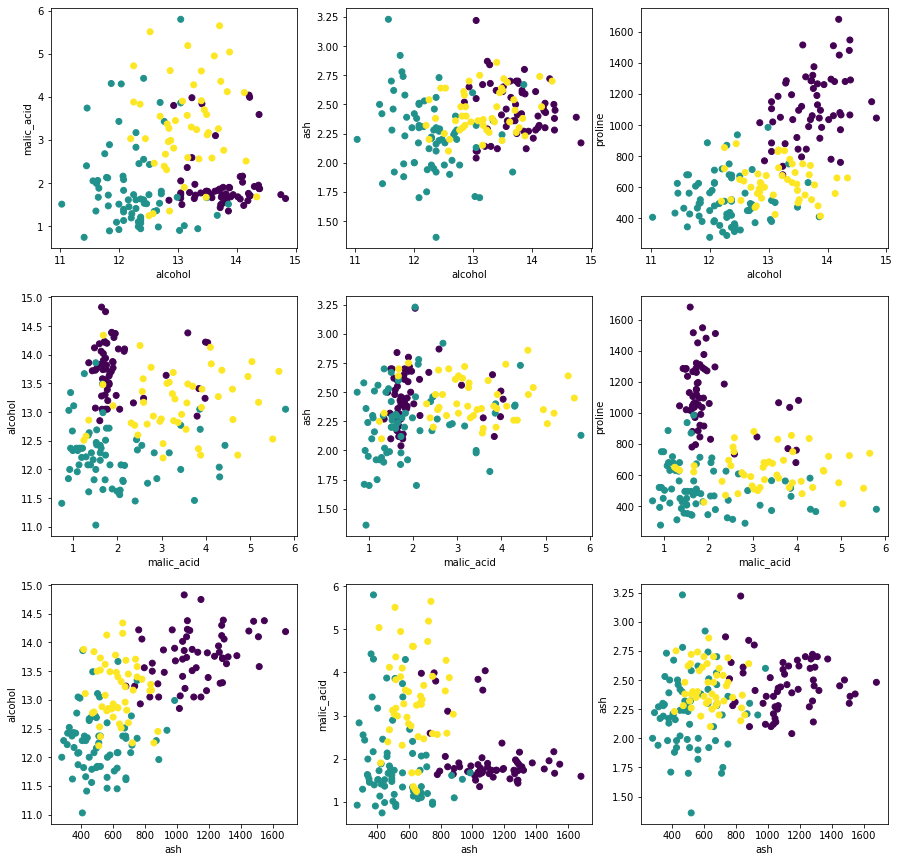

In [6]:
data = pd.DataFrame(wine.data)
feature_names = wine["feature_names"]
data.columns = feature_names
data["labels"] = wine.target             

# Todo: Plot some entries of the scatter-matrix (not all since we would get 169 plots which is to much to interpret here)
#       Interpret your results!
featureNum1 = [1,2,12]
featureNum2 = [0,2,12]
featureNum3 = [0,1,2]
fig,axs = plt.subplots(3,3,figsize=(15,15))
for i in range(len(featureNum1)):
    axs[0,i].scatter(data[feature_names[0]],data[feature_names[featureNum1[i]]],c = data["labels"])
    axs[0,i].set_xlabel(feature_names[0])
    axs[0,i].set_ylabel(feature_names[featureNum1[i]])
    axs[1,i].scatter(data[feature_names[1]],data[feature_names[featureNum2[i]]],c = data["labels"])
    axs[1,i].set_xlabel(feature_names[1])
    axs[1,i].set_ylabel(feature_names[featureNum2[i]])
    axs[2,i].scatter(data[feature_names[12]],data[feature_names[featureNum3[i]]],c = data["labels"]) 
    axs[2,i].set_xlabel(feature_names[2])
    axs[2,i].set_ylabel(feature_names[featureNum3[i]])



Until now we didn't reduce the dimension of the problem. We currently use 13 different features to classify the wine. What happens if we use less than 13 features? How can we mathematically determine a way to reduce the dimension of our problem? <br>  
## Dimension Reduction

This is where the SVD comes into play. In the next step you should compute the SVD of the matrix $A \in \mathbb{R}^{178\times 13}$ that contains the data of the wine dataset. Visualize the singular values of the matrix A.

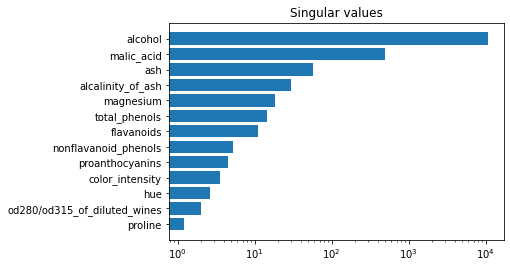

In [7]:
#Todo: Calculate SVD

A = data[feature_names].values

U, S, Vt = np.linalg.svd(A)

#Todo: Plot the SV of the matrix A and decide, how many SV we can truncate
fig,axs = plt.subplots()
axs.barh(feature_names[::-1], S[::-1])
axs.set_title(f"Singular values")
axs.set_xscale('log')




What features are the most important features when we want to classify the wine? How should we chose our k for the computation of the rank-k Approximation? Again, the Eckardt-Young-Mirsky theorem might help you when thinking about this question. <br>
In the next step you should truncate some of the SV and calculate the resulting matrices. Again, you should create scatter plots of the resulting data and interpret the results.

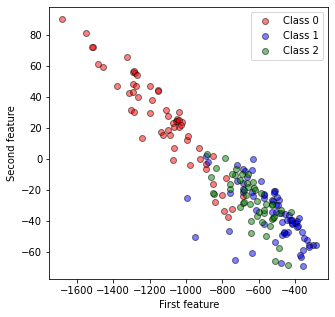

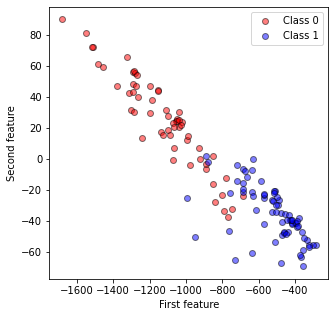

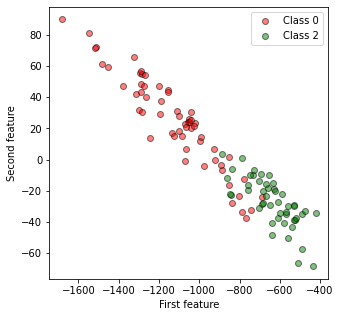

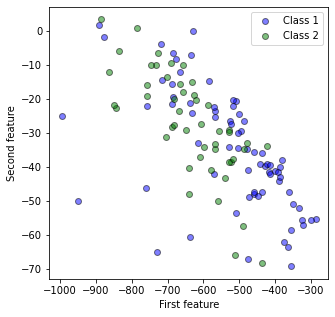

In [8]:
#Todo: Truncate the SV and calculate the truncated matrix A_k (for a suitable k)
k = 3

A = wine.data[np.isin(wine.target,[0,1,2])]

target=wine.target[np.isin(wine.target,[0,1,2])]

U, S, Vt = np.linalg.svd(A)


U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)
reduced_data = U_trunc @ np.diag(S_trunc)
trunc_A = pd.DataFrame(reduced_data)



#Todo: Visualize the data in scatter plots and interpret the results
fig,ax=plt.subplots(figsize=(5, 5))
for wineClass,colour in [(0,'r'),(1,'b'),(2,'g')]:
    data=reduced_data[target==wineClass]
    ax.scatter(data[:,0], data[:,1],c = colour,alpha=0.5,edgecolor='k',label="Class {}".format(wineClass))
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend()

# not as good as expected when using 3 features, let's try and have a look at them seperately
fig,ax=plt.subplots(figsize=(5, 5))
for wineClass,colour in [(0,'r'),(1,'b')]:
    data=reduced_data[target==wineClass]
    ax.scatter(data[:,0], data[:,1],c = colour,alpha=0.5,edgecolor='k',label="Class {}".format(wineClass))
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend()
    
fig,ax=plt.subplots(figsize=(5, 5))
for wineClass,colour in [(0,'r'),(2,'g')]:
    data=reduced_data[target==wineClass]
    ax.scatter(data[:,0], data[:,1],c = colour,alpha=0.5,edgecolor='k',label="Class {}".format(wineClass))
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend()
    
fig,ax=plt.subplots(figsize=(5, 5))
for wineClass,colour in [(1,'b'),(2,'g')]:
    data=reduced_data[target==wineClass]
    ax.scatter(data[:,0], data[:,1],c = colour,alpha=0.5,edgecolor='k',label="Class {}".format(wineClass))
    ax.set_xlabel("First feature")
    ax.set_ylabel("Second feature")
    ax.legend()


Alternatively:

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0.5, 0.98, 'Scatter-matrix for each input variable')

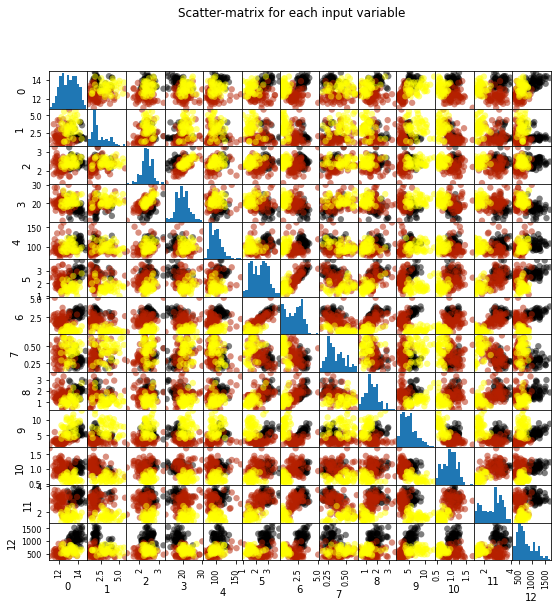

In [9]:
from pandas.plotting._misc import scatter_matrix
from matplotlib import cm
    

X = pd.DataFrame(wine.data)
print(wine["feature_names"])
y = wine.target
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')

## Classification using reduced data

The plots above give us an idea of how many SV we can truncate and still be able to classify the wine. The question one may ask is how good some classification algorithms like a Support-Vector-Machine (SVM, see [here](https://en.wikipedia.org/wiki/Support-vector_machine)) work with the reduced data. <br>
For this purpose we will use the sklearn.svm package (documentation see [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm))(At this point you don't need to know in detail, how a SVM works). <br>
To run a classification we first need to split our data set in two groups. One group is for the algorithm to learn how the data should be classified and the other group is to validate the classification after learning. To split the data we will use the function train_test_split from the sklearn.model_selection. This function gets two inputs: The raw data X and the classes y of the data. We can set the size of the groups by an additional parameter (between 0 and 1). If we don't set this parameter, the training set will be 75% of the data and the test set 25%. <br>
We will truncate $k=1,...,12$ SV and will have a look at how good the classification works. We will provide you the code for the classification, you just have to figure out how to perform the truncations. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


X = pd.DataFrame(wine.data)
y = wine.target
#Split the data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Scale the data (For better results when classifying)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Assemble to arrays that contain accuracies:

#Accuracy within the classification of the training data
accTrainSet = []
#Accuracy when operating on the test data
accTestSet = []

for i in range(len(feature_names)):
    #Todo: Truncate i SV, calculate U_k*S_k and store the result in the matrix X 
    k = 13-i
    U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)
    X = pd.DataFrame(U_trunc @ np.diag(S_trunc))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    svm = SVC()
    svm.fit(X_train, y_train)
    accTrainSet.append(svm.score(X_train,y_train))
    accTestSet.append(svm.score(X_test,y_test))

fig,axs = plt.subplots(1,2)
axs[0].plot(accTrainSet)
axs[0].set_xlabel("Number of truncated SV")
axs[0].set_ylabel("Accuracy on Training Set")

axs[1].plot(accTestSet)
axs[1].set_xlabel("Number of truncated SV")
axs[1].set_ylabel("Accuracy on Test Set")






Text(0, 0.5, 'Accuracy on Test Set')

Interpret the plots that contain the accuracies. How many SV can we truncate and still achieve a "good" result when classifying? <br>
We can see that we can truncate about 5 SV and still have an accuracy above 95%. .If this is sufficient for our task, it is enough to use 8 instead of 13 features to classify the wine.